In [1]:
import pandas as pd
from unidecode import unidecode
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.width', None)        # Evita el salto de línea automático

In [2]:
df = pd.read_excel('./data/normalized_data_coaches_tec_v2.xlsx', sheet_name='normalized_data_v4')

In [3]:
# Normalizar nombres de columnas
df.columns = [unidecode(col.lower().strip().replace(' ', '_')) for col in df.columns]

# Normalizar contenido de columnas de texto
for col in df.select_dtypes(include=['object', 'string']).columns:
    df[col] = df[col].astype(str).apply(lambda x: unidecode(x.lower().strip()))

df = df[df['email']!='octavio.garcia@tec.mx']

In [4]:
df['fecha_de_nacimiento'] = pd.to_datetime(
    pd.to_numeric(df['fecha_de_nacimiento'], errors='coerce'),
    origin='1899-12-30',
    unit='D',
    errors='coerce'
)

In [5]:
hoy = pd.Timestamp.today()
df['edad'] = (hoy - df['fecha_de_nacimiento']).dt.days // 365

In [6]:
df.head()

,nombre,apellido_paterno,apellido_materno,fecha_de_nacimiento,email,pais_de_nacimiento,pais_de_residencia,estado_de_residencia,celular,genero,respecto_al_coaching,horas_de_practica,anos_de_experiencia,ultima_vez_que_atendio_cliente,recibe_supervision_en_practica_como_coach,ha_sido_coachee,cuenta_con_certificacion,ultima_capacitacion_en_coaching,horas_de_formacion,fuente,tipo_de_contrato,curp_/_dni,?puedes_brindar_coaching_en_ingles?,foto,?esta_en_documento_de_semblanzas?,tipo_de_coaching,tipo_de_clientes,perfiles_clientes,tipo_industria,icf,emcc,icc,wabc,assessments,otros,concatenado,validacion,edad
0,pablo,etcheverry,reyes,1967-10-26,per261067@gmail.com,nan,uruguay,mintevideo,(+598) 93310417,hombre,si actualmente me dedico a ser coach,450,2,atendi a alguien este mes,nunca he recibido supervision,si,si,en los ultimos 6 meses,100,internacional,nan,nan,nan,https://drive.google.com/file/d/1zhuuj2ivvr9bj...,perfiles coaches.pptx,personal,personal,propietarios de negocios y emprendedores,"comunicaciones, entretenimiento y medios",nan,nan,nan,nan,nan,nan,pabloetcheverryreyes24771per261067@gmail.comur...,False,58.0
1,pablo,etcheverry,reyes,1967-10-26,per261067@gmail.com,nan,uruguay,mintevideo,(+598) 93310417,hombre,si actualmente me dedico a ser coach,450,2,atendi a alguien este mes,nunca he recibido supervision,si,si,en los ultimos 6 meses,100,internacional,nan,nan,nan,https://drive.google.com/file/d/1zhuuj2ivvr9bj...,perfiles coaches.pptx,personal,personal,propietarios de negocios y emprendedores,"salud, farmaceutica y ciencia",nan,nan,nan,nan,nan,nan,pabloetcheverryreyes24771per261067@gmail.comur...,False,58.0
2,pablo,etcheverry,reyes,1967-10-26,per261067@gmail.com,nan,uruguay,mintevideo,(+598) 93310417,hombre,si actualmente me dedico a ser coach,450,2,atendi a alguien este mes,nunca he recibido supervision,si,si,en los ultimos 6 meses,100,internacional,nan,nan,nan,https://drive.google.com/file/d/1zhuuj2ivvr9bj...,perfiles coaches.pptx,personal,personal,propietarios de negocios y emprendedores,"manufactura, ingenieria y construccion",nan,nan,nan,nan,nan,nan,pabloetcheverryreyes24771per261067@gmail.comur...,False,58.0
3,pablo,etcheverry,reyes,1967-10-26,per261067@gmail.com,nan,uruguay,mintevideo,(+598) 93310417,hombre,si actualmente me dedico a ser coach,450,2,atendi a alguien este mes,nunca he recibido supervision,si,si,en los ultimos 6 meses,100,internacional,nan,nan,nan,https://drive.google.com/file/d/1zhuuj2ivvr9bj...,perfiles coaches.pptx,personal,personal,propietarios de negocios y emprendedores,servicios profesionales y financieros,nan,nan,nan,nan,nan,nan,pabloetcheverryreyes24771per261067@gmail.comur...,False,58.0
4,pablo,etcheverry,reyes,1967-10-26,per261067@gmail.com,nan,uruguay,mintevideo,(+598) 93310417,hombre,si actualmente me dedico a ser coach,450,2,atendi a alguien este mes,nunca he recibido supervision,si,si,en los ultimos 6 meses,100,internacional,nan,nan,nan,https://drive.google.com/file/d/1zhuuj2ivvr9bj...,perfiles coaches.pptx,personal,personal,propietarios de negocios y emprendedores,retail y consumo,nan,nan,nan,nan,nan,nan,pabloetcheverryreyes24771per261067@gmail.comur...,False,58.0


/var/folders/mq/9wkfsvsx4jnb3y5y2mjxjr180000gp/T/ipykernel_83724/3113317219.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique[num_cols] = df_unique[num_cols].apply(pd.to_numeric, errors="coerce")


array([[<Axes: title={'center': 'horas_de_practica'}>,
        <Axes: title={'center': 'anos_de_experiencia'}>],
       [<Axes: title={'center': 'horas_de_formacion'}>,
        <Axes: title={'center': 'edad'}>]], dtype=object)

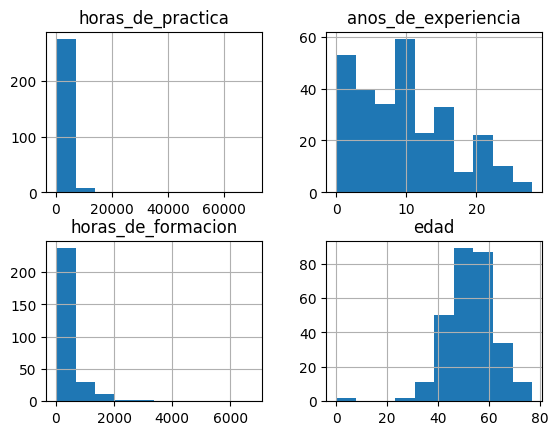

In [7]:
num_cols = ['horas_de_practica', 'anos_de_experiencia', 'horas_de_formacion', 'edad']

df_unique = df.drop_duplicates(subset='email', ignore_index=True)

df_unique[num_cols] = df_unique[num_cols].apply(pd.to_numeric, errors="coerce")
df_unique[num_cols].hist()

<Axes: >

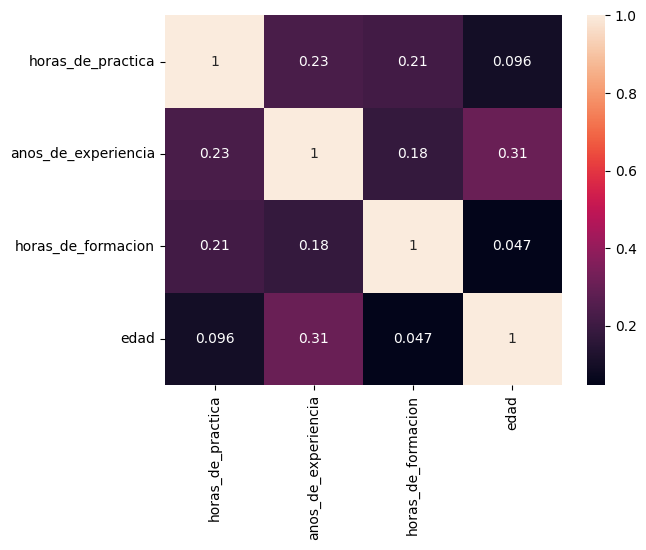

In [8]:
sns.heatmap(df_unique[num_cols].corr(), annot=True)

In [9]:
def remove_outliers_iqr(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

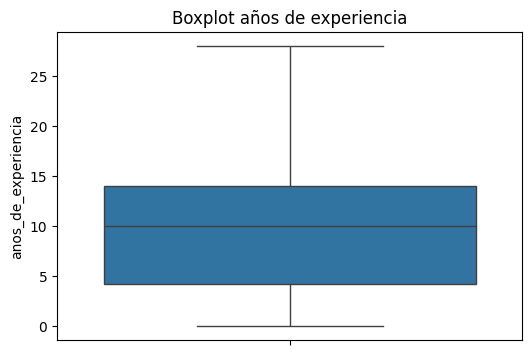

In [50]:
plt.figure(figsize=(6,4))
sns.boxplot(
    y=remove_outliers_iqr(df_unique, 'anos_de_experiencia')['anos_de_experiencia']
)
plt.title('Boxplot años de experiencia')
plt.show()

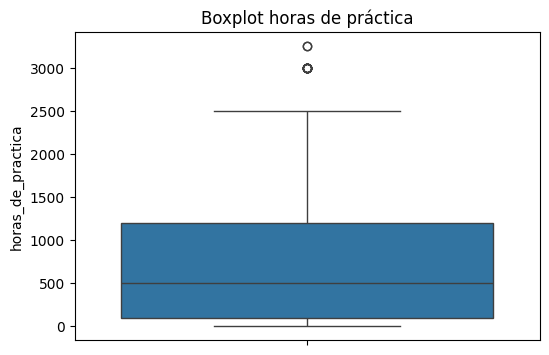

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(
    y=remove_outliers_iqr(df_unique, 'horas_de_practica')['horas_de_practica']
)
plt.title('Boxplot horas de práctica')
plt.show()

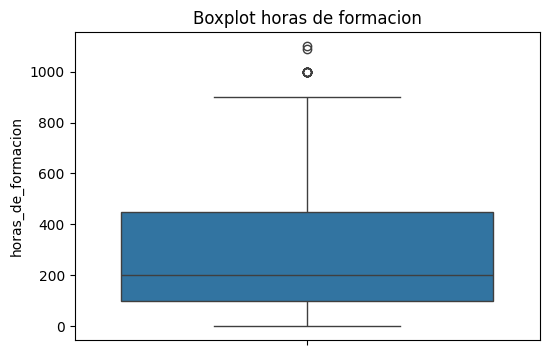

In [51]:
plt.figure(figsize=(6,4))
sns.boxplot(
    y=remove_outliers_iqr(df_unique, 'horas_de_formacion')['horas_de_formacion']
)
plt.title('Boxplot horas de formacion')
plt.show()

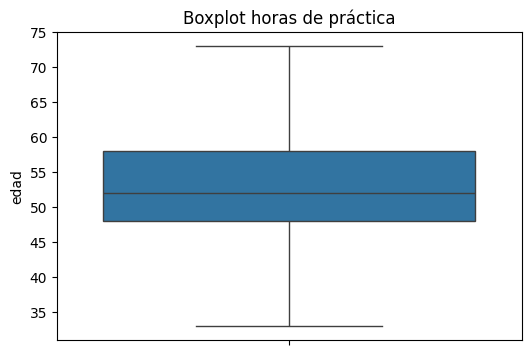

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(
    y=remove_outliers_iqr(df_unique, 'edad')['edad']
)
plt.title('Boxplot horas de práctica')
plt.show()

/var/folders/mq/9wkfsvsx4jnb3y5y2mjxjr180000gp/T/ipykernel_83724/2983816826.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['rango_edad'] = pd.cut(df_unique['edad'], bins=bins, labels=labels, right=False)


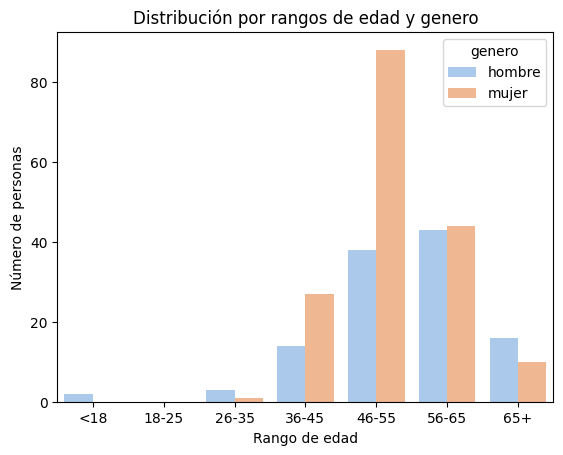

In [20]:
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df_unique['rango_edad'] = pd.cut(df_unique['edad'], bins=bins, labels=labels, right=False)

sns.countplot(x='rango_edad', data=df_unique, hue='genero',palette='pastel')
plt.title('Distribución por rangos de edad y genero')
plt.xlabel('Rango de edad')
plt.ylabel('Número de personas')
plt.show()


/var/folders/mq/9wkfsvsx4jnb3y5y2mjxjr180000gp/T/ipykernel_83724/819618803.py:23: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabla = df.pivot_table(index="rango_edad", columns=gender_col, values=age_col, aggfunc="count").fillna(0)


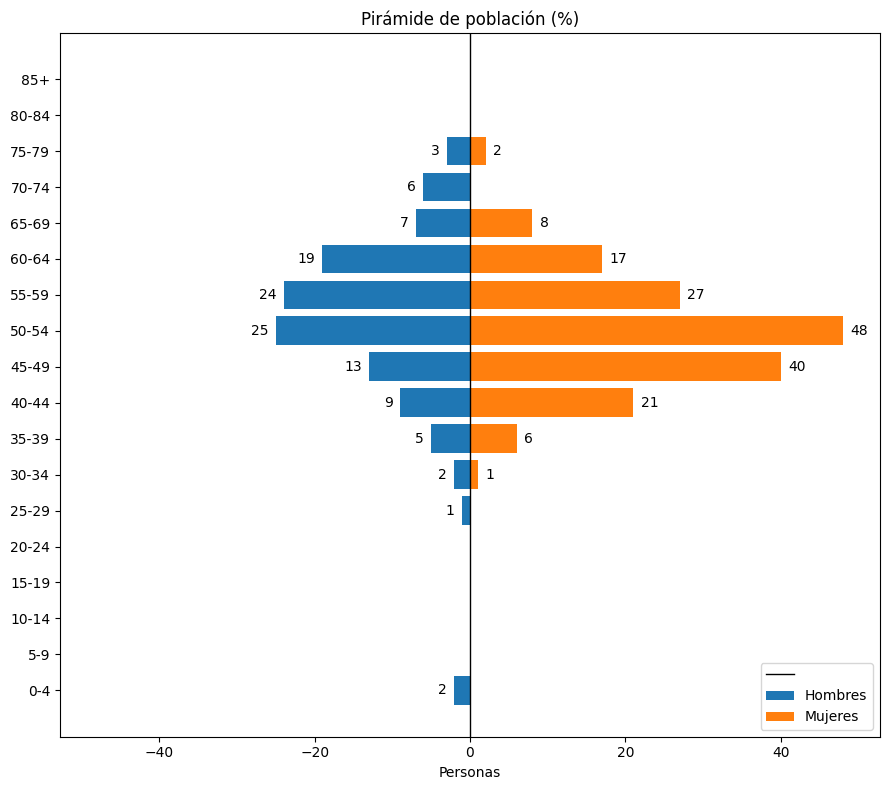

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_population_pyramid(
    df,
    age_col="edad",
    gender_col="genero",
    bins=(0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,120),
    labels=None,
    percent=False,          # True para porcentajes dentro de cada rango
    title="Pirámide de población"
):
    # 1) Rango de edades
    if labels is None:
        labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]
        labels[-1] = f"{bins[-2]}+"
    df = df.copy()
    df["rango_edad"] = pd.cut(df[age_col], bins=bins, labels=labels, right=False)


    # 3) Tabla de conteos por rango y género
    tabla = df.pivot_table(index="rango_edad", columns=gender_col, values=age_col, aggfunc="count").fillna(0)
    # Asegurar orden de etiquetas
    tabla = tabla.reindex(labels)

    if percent:
        tabla = (tabla.T / tabla.sum(axis=1).replace(0, np.nan)).T * 100

    # 4) Preparar valores (hombres negativos para graficar a la izquierda)
    hombres = -tabla.get("hombre", pd.Series(0, index=tabla.index))
    mujeres  =  tabla.get("mujer",  pd.Series(0, index=tabla.index))

    # 5) Gráfico
    fig, ax = plt.subplots(figsize=(9, 8))
    y = np.arange(len(tabla.index))
    ax.barh(y, hombres.values, align="center")  # izquierda (negativos)
    ax.barh(y, mujeres.values, align="center")  # derecha (positivos)

    # Ejes y títulos
    ax.set_yticks(y)
    ax.set_yticklabels(tabla.index.astype(str))
    ax.set_xlabel("%" if percent else "Personas")
    ax.set_title(title)

    # Eje X simétrico
    max_val = max(abs(hombres.min()), mujeres.max())
    ax.set_xlim(-max_val*1.1, max_val*1.1)

    # Línea central
    ax.axvline(0, color="black", linewidth=1)

    # Anotar valores (opcional)
    for yi, (h, m) in enumerate(zip(hombres.values, mujeres.values)):
        if h != 0: ax.text(h - (max_val*0.02), yi, f"{abs(h):.1f}" if percent else f"{int(abs(h))}", va="center", ha="right")
        if m != 0: ax.text(m + (max_val*0.02), yi, f"{m:.1f}" if percent else f"{int(m)}", va="center", ha="left")

    # Leyenda sencilla
    ax.legend(["", "Hombres", "Mujeres"], loc="lower right")

    plt.tight_layout()
    plt.show()

# Ejemplos de uso:
# Conteos absolutos
# plot_population_pyramid(df, age_col="edad", gender_col="Genero", title="Pirámide de población (conteos)")
# Porcentajes dentro de cada rango
    
plot_population_pyramid(df_unique, age_col="edad", gender_col="genero", percent=False, title="Pirámide de población (%)")


In [22]:
df_unique.head()

,nombre,apellido_paterno,apellido_materno,fecha_de_nacimiento,email,pais_de_nacimiento,pais_de_residencia,estado_de_residencia,celular,genero,respecto_al_coaching,horas_de_practica,anos_de_experiencia,ultima_vez_que_atendio_cliente,recibe_supervision_en_practica_como_coach,ha_sido_coachee,cuenta_con_certificacion,ultima_capacitacion_en_coaching,horas_de_formacion,fuente,tipo_de_contrato,curp_/_dni,?puedes_brindar_coaching_en_ingles?,foto,?esta_en_documento_de_semblanzas?,tipo_de_coaching,tipo_de_clientes,perfiles_clientes,tipo_industria,icf,emcc,icc,wabc,assessments,otros,concatenado,validacion,edad,rango_edad
0,pablo,etcheverry,reyes,1967-10-26,per261067@gmail.com,nan,uruguay,mintevideo,(+598) 93310417,hombre,si actualmente me dedico a ser coach,450.0,2.0,atendi a alguien este mes,nunca he recibido supervision,si,si,en los ultimos 6 meses,100.0,internacional,nan,nan,nan,https://drive.google.com/file/d/1zhuuj2ivvr9bj...,perfiles coaches.pptx,personal,personal,propietarios de negocios y emprendedores,"comunicaciones, entretenimiento y medios",nan,nan,nan,nan,nan,nan,pabloetcheverryreyes24771per261067@gmail.comur...,False,58.0,56-65
1,monica,franco,angel,1963-03-11,monifrancoangel@hotmail.com,nan,colombia,valle del cauca,573166298078,mujer,si actualmente me dedico a ser coach,1000.0,10.0,atendi a alguien este mes,"si, ocasionalmente",si,si,en el ultimo ano,300.0,internacional,nan,nan,nan,https://drive.google.com/file/d/1ydm1dmqf79edx...,perfiles coaches.pptx,personal,personal,propietarios de negocios y emprendedores,educacion,pcc,nan,nan,nan,lcp,nan,monicafrancoangel23081monifrancoangel@hotmail....,False,62.0,56-65
2,aida florencia,medina,lorza,1967-04-23,afmedina@hotmail.com,nan,colombia,cali,(+57) 3155534729,mujer,si actualmente me dedico a ser coach,3000.0,15.0,atendi a alguien este mes,"si, ocasionalmente",si,si,en los ultimos 6 meses,500.0,internacional,nan,nan,nan,https://drive.google.com/file/d/1wpz8xycadraif...,perfiles coaches.pptx,personal,personal,propietarios de negocios y emprendedores,"comunicaciones, entretenimiento y medios",mcc,nan,nan,wabc certified business coach (cbc),lcp,nan,aida florenciamedinalorza24585afmedina@hotmail...,False,58.0,56-65
3,mauricio,oltra,sanchez,1966-08-28,oltra@coachingtechnologies.org,nan,nan,morelos,525585801539,hombre,si actualmente me dedico a ser coach,3000.0,25.0,atendi a alguien este mes,"si, ocasionalmente",no,si,en los ultimos 6 meses,500.0,pase,nan,nan,nan,https://drive.google.com/file/d/1w8s90gq2vyzjd...,perfiles coaches.pptx,personal,organizacion,propietarios de negocios y emprendedores,"comunicaciones, entretenimiento y medios",pcc,practitioner,icc certificacion internacional (cic),nan,nan,ict / tec,mauriciooltrasanchez24347oltra@coachingtechnol...,False,59.0,56-65
4,claudia maria michele,villaran,zegarra,1967-02-04,claudiavillaran@gmail.com,nan,mexico,cdmx,5521104913,mujer,si actualmente me dedico a ser coach,1800.0,6.0,atendi a alguien este mes,"si, ocasionalmente",si,si,en los ultimos 6 meses,647.0,pase,nan,nan,nan,https://drive.google.com/file/d/1vss3an2uh0duu...,perfiles coaches.pptx,personal,personal,ejecutivos alto nivel c-suite:ceo/cfo/cto,"comunicaciones, entretenimiento y medios",pcc,nan,nan,nan,lcp,nan,claudia maria michelevillaranzegarra24507claud...,False,58.0,56-65


In [48]:
df_unique['ultima_vez_que_atendio_cliente'].unique()

array(['atendi a alguien este mes', 'hace mas de 1 ano',
       'hace mas de 1 mes', 'hace mas de 3 meses', 'nan',
       'hace mas de 2 anos', 'hace mas de 6 meses'], dtype=object)

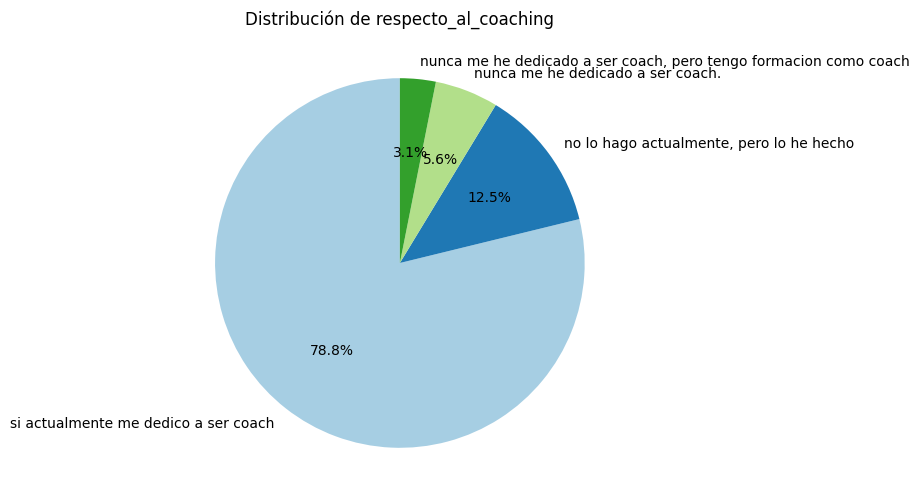

In [24]:
col = 'respecto_al_coaching'  # reemplaza con el nombre de tu columna

# Contamos cuántos hay por categoría
valores = df_unique[col].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    valores, 
    labels=valores.index,
    autopct='%1.1f%%',      # muestra el porcentaje con 1 decimal
    startangle=90,          # comienza el gráfico desde arriba
    colors=plt.cm.Paired.colors  # paleta de colores agradable
)
plt.title(f'Distribución de {col}')
plt.show()

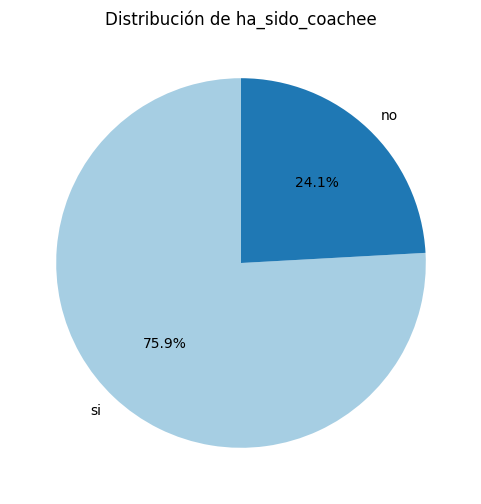

In [44]:
col = 'ha_sido_coachee'  # reemplaza con el nombre de tu columna

# Contamos cuántos hay por categoría
df_nonan = df_unique[df_unique[col]!='nan']
valores = df_nonan[col].value_counts()


plt.figure(figsize=(6,6))
plt.pie(
    valores, 
    labels=valores.index,
    autopct='%1.1f%%',      # muestra el porcentaje con 1 decimal
    startangle=90,          # comienza el gráfico desde arriba
    colors=plt.cm.Paired.colors  # paleta de colores agradable
)
plt.title(f'Distribución de {col}')
plt.show()

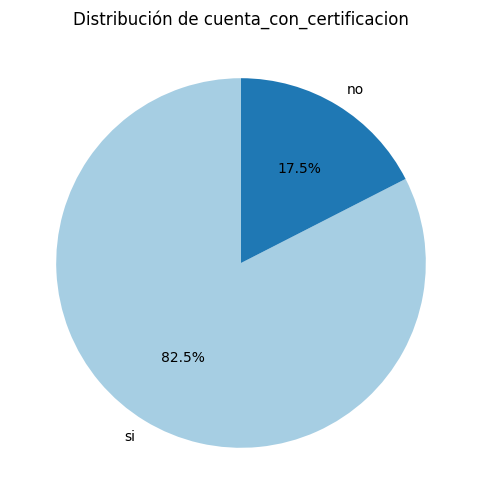

In [45]:
col = 'cuenta_con_certificacion'  # reemplaza con el nombre de tu columna

# Contamos cuántos hay por categoría
df_nonan = df_unique[df_unique[col]!='nan']
valores = df_nonan[col].value_counts()


plt.figure(figsize=(6,6))
plt.pie(
    valores, 
    labels=valores.index,
    autopct='%1.1f%%',      # muestra el porcentaje con 1 decimal
    startangle=90,          # comienza el gráfico desde arriba
    colors=plt.cm.Paired.colors  # paleta de colores agradable
)
plt.title(f'Distribución de {col}')
plt.show()

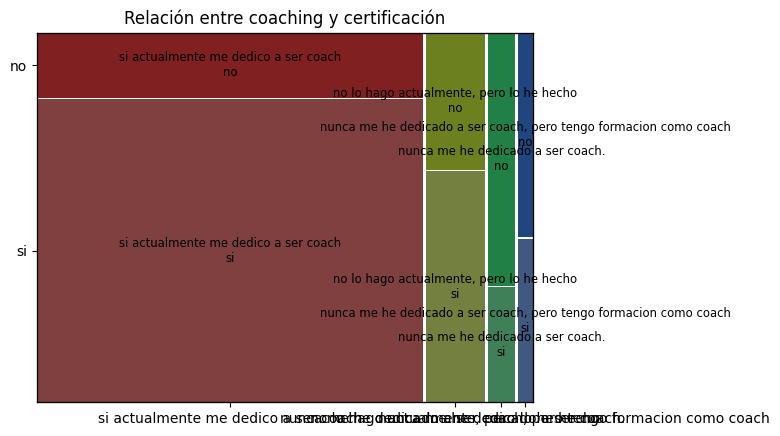

In [41]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(df_nonan, ['respecto_al_coaching', 'ha_sido_coachee'])
plt.title('Relación entre coaching y certificación')
plt.show()

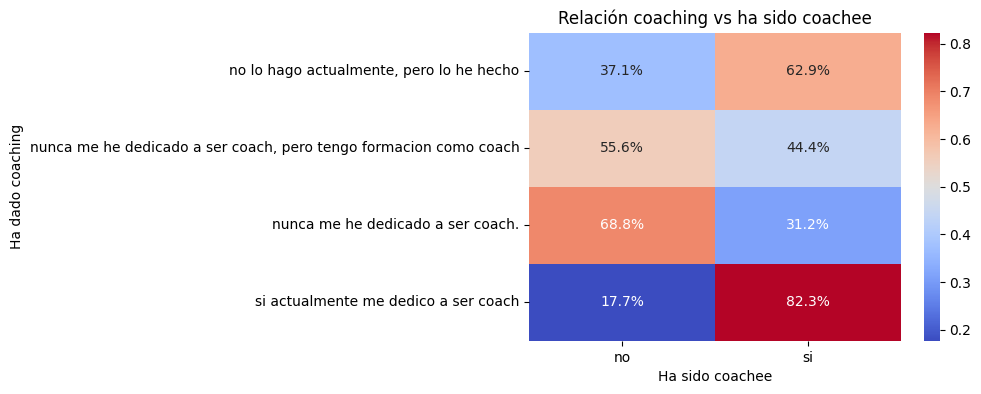

In [49]:
import seaborn as sns

tabla = pd.crosstab(df_nonan['respecto_al_coaching'], df_nonan['ha_sido_coachee'], normalize='index')
plt.figure(figsize=(6,4))
sns.heatmap(tabla, annot=True, fmt='.1%', cmap='coolwarm')
plt.title('Relación coaching vs ha sido coachee')
plt.xlabel('Ha sido coachee')
plt.ylabel('Ha dado coaching')
plt.show()


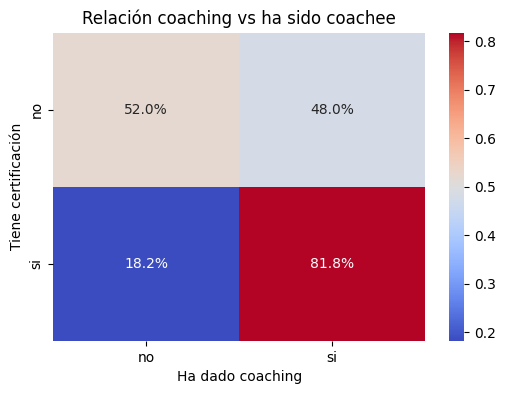

In [47]:
import seaborn as sns

tabla = pd.crosstab(df_nonan['cuenta_con_certificacion'], df_nonan['ha_sido_coachee'], normalize='index')
plt.figure(figsize=(6,4))
sns.heatmap(tabla, annot=True, fmt='.1%', cmap='coolwarm')
plt.title('Relación coaching vs ha sido coachee')
plt.ylabel('Tiene certificación')
plt.xlabel('Ha dado coaching')
plt.show()


In [53]:
df_unique.head()

,nombre,apellido_paterno,apellido_materno,fecha_de_nacimiento,email,pais_de_nacimiento,pais_de_residencia,estado_de_residencia,celular,genero,respecto_al_coaching,horas_de_practica,anos_de_experiencia,ultima_vez_que_atendio_cliente,recibe_supervision_en_practica_como_coach,ha_sido_coachee,cuenta_con_certificacion,ultima_capacitacion_en_coaching,horas_de_formacion,fuente,tipo_de_contrato,curp_/_dni,?puedes_brindar_coaching_en_ingles?,foto,?esta_en_documento_de_semblanzas?,tipo_de_coaching,tipo_de_clientes,perfiles_clientes,tipo_industria,icf,emcc,icc,wabc,assessments,otros,concatenado,validacion,edad,rango_edad
0,pablo,etcheverry,reyes,1967-10-26,per261067@gmail.com,nan,uruguay,mintevideo,(+598) 93310417,hombre,si actualmente me dedico a ser coach,450.0,2.0,atendi a alguien este mes,nunca he recibido supervision,si,si,en los ultimos 6 meses,100.0,internacional,nan,nan,nan,https://drive.google.com/file/d/1zhuuj2ivvr9bj...,perfiles coaches.pptx,personal,personal,propietarios de negocios y emprendedores,"comunicaciones, entretenimiento y medios",nan,nan,nan,nan,nan,nan,pabloetcheverryreyes24771per261067@gmail.comur...,False,58.0,56-65
1,monica,franco,angel,1963-03-11,monifrancoangel@hotmail.com,nan,colombia,valle del cauca,573166298078,mujer,si actualmente me dedico a ser coach,1000.0,10.0,atendi a alguien este mes,"si, ocasionalmente",si,si,en el ultimo ano,300.0,internacional,nan,nan,nan,https://drive.google.com/file/d/1ydm1dmqf79edx...,perfiles coaches.pptx,personal,personal,propietarios de negocios y emprendedores,educacion,pcc,nan,nan,nan,lcp,nan,monicafrancoangel23081monifrancoangel@hotmail....,False,62.0,56-65
2,aida florencia,medina,lorza,1967-04-23,afmedina@hotmail.com,nan,colombia,cali,(+57) 3155534729,mujer,si actualmente me dedico a ser coach,3000.0,15.0,atendi a alguien este mes,"si, ocasionalmente",si,si,en los ultimos 6 meses,500.0,internacional,nan,nan,nan,https://drive.google.com/file/d/1wpz8xycadraif...,perfiles coaches.pptx,personal,personal,propietarios de negocios y emprendedores,"comunicaciones, entretenimiento y medios",mcc,nan,nan,wabc certified business coach (cbc),lcp,nan,aida florenciamedinalorza24585afmedina@hotmail...,False,58.0,56-65
3,mauricio,oltra,sanchez,1966-08-28,oltra@coachingtechnologies.org,nan,nan,morelos,525585801539,hombre,si actualmente me dedico a ser coach,3000.0,25.0,atendi a alguien este mes,"si, ocasionalmente",no,si,en los ultimos 6 meses,500.0,pase,nan,nan,nan,https://drive.google.com/file/d/1w8s90gq2vyzjd...,perfiles coaches.pptx,personal,organizacion,propietarios de negocios y emprendedores,"comunicaciones, entretenimiento y medios",pcc,practitioner,icc certificacion internacional (cic),nan,nan,ict / tec,mauriciooltrasanchez24347oltra@coachingtechnol...,False,59.0,56-65
4,claudia maria michele,villaran,zegarra,1967-02-04,claudiavillaran@gmail.com,nan,mexico,cdmx,5521104913,mujer,si actualmente me dedico a ser coach,1800.0,6.0,atendi a alguien este mes,"si, ocasionalmente",si,si,en los ultimos 6 meses,647.0,pase,nan,nan,nan,https://drive.google.com/file/d/1vss3an2uh0duu...,perfiles coaches.pptx,personal,personal,ejecutivos alto nivel c-suite:ceo/cfo/cto,"comunicaciones, entretenimiento y medios",pcc,nan,nan,nan,lcp,nan,claudia maria michelevillaranzegarra24507claud...,False,58.0,56-65


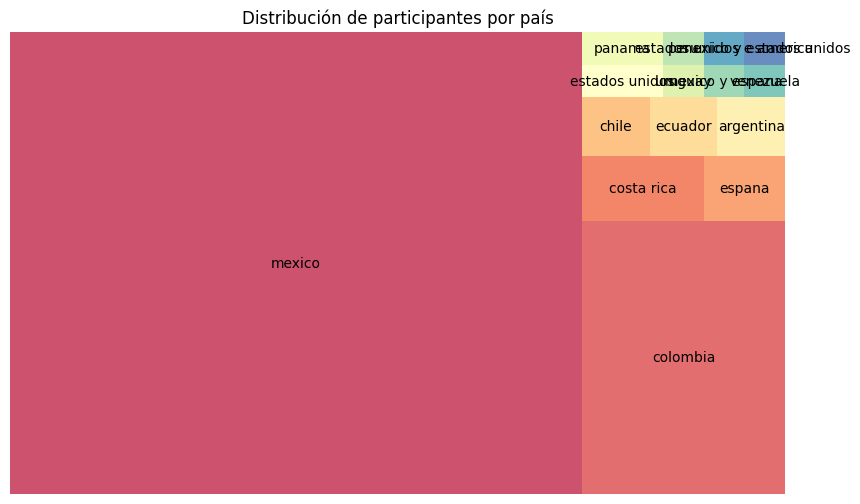

In [56]:
import squarify
import matplotlib.pyplot as plt


df_paises = df_unique[df_unique['pais_de_residencia']!='nan']
valores = df_paises['pais_de_residencia'].value_counts().head(20)

plt.figure(figsize=(10,6))
squarify.plot(sizes=valores.values, label=valores.index, alpha=0.8, color=sns.color_palette('Spectral', len(valores)))
plt.title('Distribución de participantes por país')
plt.axis('off')
plt.show()


/var/folders/mq/9wkfsvsx4jnb3y5y2mjxjr180000gp/T/ipykernel_83724/2798684725.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=paises.values, y=paises.index, palette='viridis')


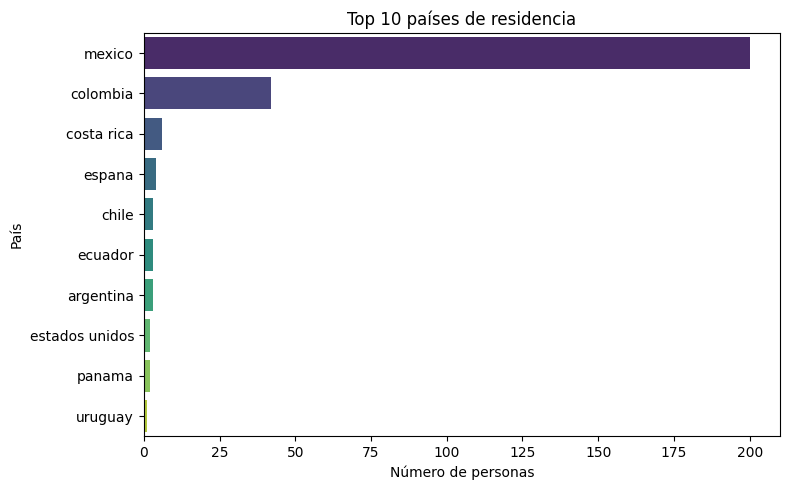

In [57]:
top_n = 10  # o todos si quieres ver todos los países
paises = df_paises['pais_de_residencia'].value_counts().head(top_n)

plt.figure(figsize=(8,5))
sns.barplot(x=paises.values, y=paises.index, palette='viridis')
plt.title(f'Top {top_n} países de residencia')
plt.xlabel('Número de personas')
plt.ylabel('País')
plt.tight_layout()
plt.show()

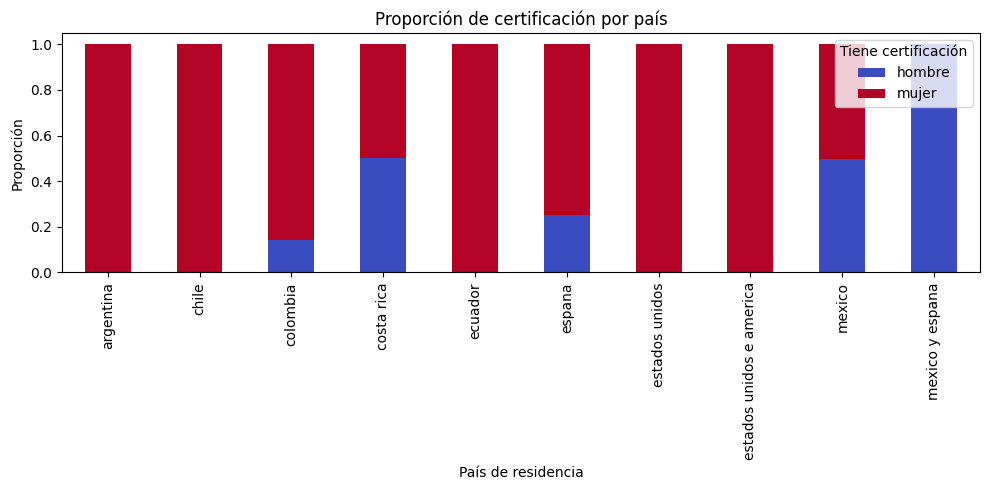

In [58]:
tabla = pd.crosstab(df_paises['pais_de_residencia'], df_paises['genero'], normalize='index').head(10)

tabla.plot(kind='bar', stacked=True, figsize=(10,5), colormap='coolwarm')
plt.title('Proporción de género por país')
plt.xlabel('País de residencia')
plt.ylabel('Proporción')
plt.legend(title='Tiene certificación')
plt.tight_layout()
plt.show()

In [65]:
import plotly.express as px
import geopandas as gpd
import folium

# Agrupar la cantidad de personas por país
paises = df_paises['pais_de_residencia'].value_counts().reset_index()
paises.columns = ['pais_de_residencia', 'cantidad']

# === 2. Cargar el mapa mundial desde una fuente actualizada ===
url_geojson = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json"
world = gpd.read_file(url_geojson)

# ==== 3) Crea el mapa base ====
m = folium.Map(location=[20, 0], zoom_start=2, tiles='cartodbpositron')

# ==== 4) Capa choropleth por cantidad ====
folium.Choropleth(
    geo_data=world.__geo_interface__,            # GeoJSON del mundo
    data=paises,
    columns=['pais_de_residencia', 'cantidad'],     # (key, value)
    key_on='feature.properties.name',            # une por nombre del país
    fill_color='YlGnBu',
    fill_opacity=0.8,
    line_opacity=0.3,
    nan_fill_color='lightgray',
    legend_name='Cantidad de personas'
).add_to(m)

# ==== 5) Tooltip con nombre y cantidad ====
# Unimos para poder mostrar la cantidad en el tooltip
merged = world.merge(paises, left_on='name', right_on='pais_de_residencia', how='left')

folium.GeoJson(
    merged.to_json(),
    name="info",
    style_function=lambda x: {"weight": 0.3, "color": "white", "fillOpacity": 0},
    tooltip=folium.GeoJsonTooltip(
        fields=['name', 'cantidad'],
        aliases=['País', 'Cantidad'],
        localize=True,
        labels=True
    )
).add_to(m)

folium.LayerControl().add_to(m)

m

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1018)>